In [7]:
#importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import ttest_ind #Independent Sample T-test
from scipy.stats import f_oneway #One-Way ANOVA
from scipy.stats import levene

from pandas_datareader import data as d

**Task 1. Read the data, sheet data_1.**

In [8]:
#reading data
data=pd.read_excel('companies.xlsx',sheet_name='data_1')

 Task 2.	Check the data for the following information:
- i.	N of rows, columns
- ii.	N of columns that have missing values
- iii. N of numeric and non-numeric variables


In [9]:
data.head()

,id,rank,workers,company,url,state_l,state_s,city,metro,growth,revenue,industry,rank_code
0,26615,4734.0,39,Point-of-Rental Systems,point-of-rental-systems,Texas,TX,Grand Prairie,Dallas,50.8338,6802255,Software,Other
1,26527,4144.0,9,RH Electronics,rh-electronics,California,CA,Oceanside,San Diego,69.9740,2150266,Manufacturing,Other
2,26620,1623.0,40,CharTec,chartec,California,CA,Bakersfield,Bakersfield CA,262.4610,10382361,IT Services,Other
3,26619,2623.0,26,California Midwest Xpress,california-midwest-xpress,California,CA,Torrance,Los Angeles,143.2896,4149255,Logistics & Transportation,Other
4,26618,3051.0,34,AvAir,avair,Arizona,AZ,Chandler,Phoenix,116.5030,40730169,Logistics & Transportation,Other


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5000 non-null   int64  
 1   rank       4999 non-null   float64
 2   workers    5000 non-null   int64  
 3   company    4999 non-null   object 
 4   url        4999 non-null   object 
 5   state_l    4999 non-null   object 
 6   state_s    4999 non-null   object 
 7   city       5000 non-null   object 
 8   metro      4942 non-null   object 
 9   growth     5000 non-null   float64
 10  revenue    5000 non-null   int64  
 11  industry   5000 non-null   object 
 12  rank_code  5000 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 507.9+ KB


> The data has 12 columns and 5000 rows. The data has 5 numeric and 8 object variables

In [11]:
sum(data.isna().sum()>0)

6

> 6 variables have missing values.

**Task 3. If there are any missing values, drop them.**

In [23]:
data.dropna(inplace=True)

In [27]:
sum(data.isna().sum()>1)

0

> No missing values after dropping them, now we're good to continue.

In [26]:
data.head()

,id,rank,workers,company,url,state_l,state_s,city,metro,growth,revenue,industry,rank_code
0,26615,4734.0,39,Point-of-Rental Systems,point-of-rental-systems,Texas,TX,Grand Prairie,Dallas,50.8338,6802255,Software,Other
1,26527,4144.0,9,RH Electronics,rh-electronics,California,CA,Oceanside,San Diego,69.9740,2150266,Manufacturing,Other
2,26620,1623.0,40,CharTec,chartec,California,CA,Bakersfield,Bakersfield CA,262.4610,10382361,IT Services,Other
3,26619,2623.0,26,California Midwest Xpress,california-midwest-xpress,California,CA,Torrance,Los Angeles,143.2896,4149255,Logistics & Transportation,Other
4,26618,3051.0,34,AvAir,avair,Arizona,AZ,Chandler,Phoenix,116.5030,40730169,Logistics & Transportation,Other


In [29]:
data.workers[0]

39

**Task 4.	Define a function that will code number of workers to the following categories:
if number of workers <250 then ‘small and medium’ else “Large” companies.** 
-	How many small and medium companies the data contains?


In [32]:
def coder(number_workers):
    if number_workers<250:
        out="SME"
    else:
        out="Large"
    return out

In [40]:
#after dropping NAs, some of row indexes have been deleted (e.g. 5th index)
#reseting indexes starts numbering the rows from 0 again
data.reset_index(inplace=True) 

In [41]:
coder(data.workers[5])

'SME'

In [44]:
coded_val=[]
for i in range(len(data.workers)):
    coded_val.append(coder(data.workers[i]))
coded_val[:10]

['SME', 'SME', 'SME', 'SME', 'SME', 'SME', 'SME', 'SME', 'Large', 'Large']

In [45]:
data['company_size']=coded_val

In [46]:
data.head(2)

,index,id,rank,workers,company,url,state_l,state_s,city,metro,growth,revenue,industry,rank_code,company_size
0,0,26615,4734.0,39,Point-of-Rental Systems,point-of-rental-systems,Texas,TX,Grand Prairie,Dallas,50.8338,6802255,Software,Other,SME
1,1,26527,4144.0,9,RH Electronics,rh-electronics,California,CA,Oceanside,San Diego,69.9740,2150266,Manufacturing,Other,SME


In [47]:
data.company_size.value_counts()

SME      4287
Large     650
Name: company_size, dtype: int64

> **The data contains 4287 small and medium companies.**

**Task 5.	Check the correlations between numeric variables. Which variables have the highest correlations?**

In [50]:
data.select_dtypes(exclude='object').corr()

,index,id,rank,workers,growth,revenue
index,1.000000,-0.834127,0.337528,0.076014,-0.096410,0.093871
id,-0.834127,1.000000,-0.352258,-0.093694,0.083423,-0.115336
rank,0.337528,-0.352258,1.000000,0.073241,-0.229391,0.067557
workers,0.076014,-0.093694,0.073241,1.000000,-0.012483,0.269384
growth,-0.096410,0.083423,-0.229391,-0.012483,1.000000,0.001691
revenue,0.093871,-0.115336,0.067557,0.269384,0.001691,1.000000


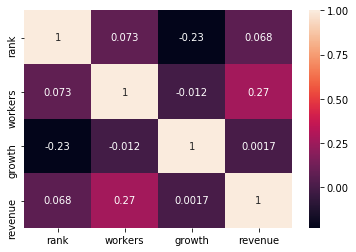

In [54]:
#when checking correlations we exclude ID and index columns as there is no meaning to run corr between id/index and other vars
sns.heatmap(data.iloc[:,2:].corr(),annot=True) 

plt.show()

> workers and revenue variables have the highest correlations.

**6.	Write a for loop that will return the distribution charts of all numeric variables. You’re free to choose the chart type. Which one is the most skewed variable?**

In [58]:
#first let's create a subset of data that contains all numeric columns for which charts should be constructed
#ID and index should be excluded as there is no meaning to check distribution for IDs or indexes
data_num=data.iloc[:,2:].select_dtypes(exclude='object')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 4 columns):
rank       4937 non-null float64
workers    4937 non-null int64
growth     4937 non-null float64
revenue    4937 non-null int64
dtypes: float64(2), int64(2)
memory usage: 154.4 KB


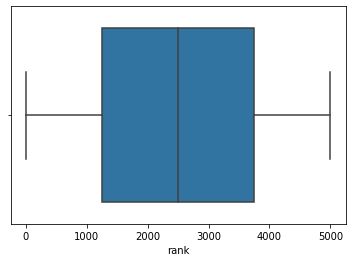

In [72]:
#boxplot for one variable
sns.boxplot(data_num['rank'])

plt.show()

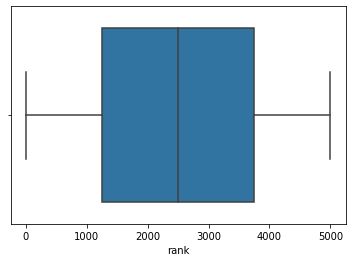

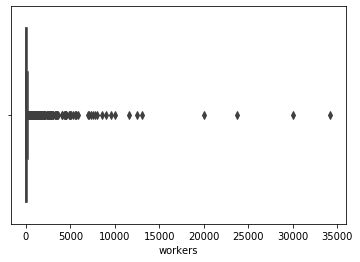

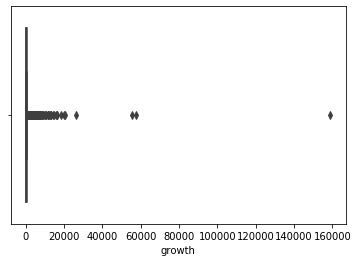

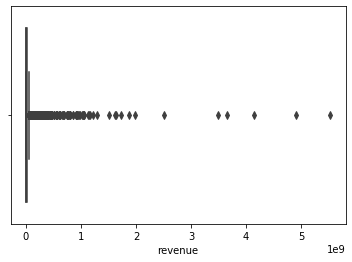

In [73]:
#boxplots for all numeric variables
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.show()

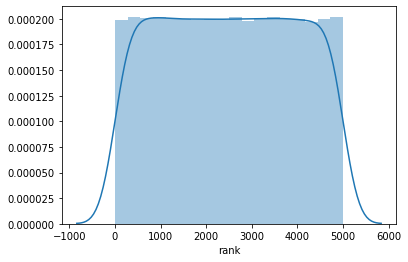

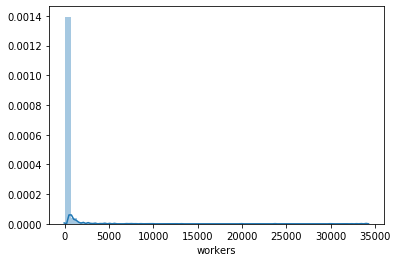

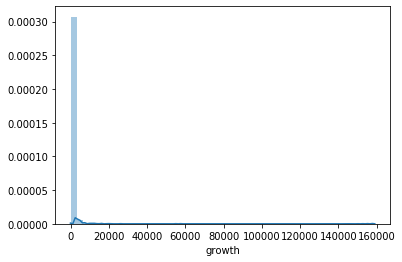

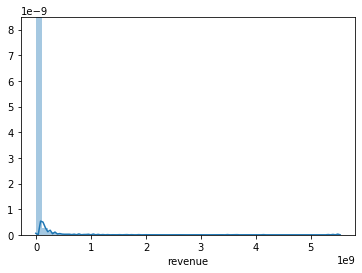

In [74]:
#dist plot for all numeric variables in data_num dataset
for i in data_num.columns:
    sns.distplot(data_num[i])
    plt.show()

**Task 7.	Replace “?” sign with np.nan (i.e. numpy NA value) in industry column.**

In [75]:
data.industry.unique()

array(['Software', 'Manufacturing', 'IT Services',
       'Logistics & Transportation', 'Health', '?',
       'Business Products & Services', 'Financial Services',
       'Construction', 'Security', 'Retail', 'Energy',
       'Consumer Products & Services', 'Education', 'Government Services',
       'Food & Beverage', 'Insurance', 'Telecommunications',
       'Real Estate', 'Human Resources', 'Advertising & Marketing',
       'Media', 'Engineering', 'Computer Hardware',
       'Environmental Services', 'Travel & Hospitality'], dtype=object)

In [76]:
data['industry']=np.where(data.industry=='?',
                         np.nan, #NAs
                          data.industry
                         )
data.industry.unique()

array(['Software', 'Manufacturing', 'IT Services',
       'Logistics & Transportation', 'Health', nan,
       'Business Products & Services', 'Financial Services',
       'Construction', 'Security', 'Retail', 'Energy',
       'Consumer Products & Services', 'Education', 'Government Services',
       'Food & Beverage', 'Insurance', 'Telecommunications',
       'Real Estate', 'Human Resources', 'Advertising & Marketing',
       'Media', 'Engineering', 'Computer Hardware',
       'Environmental Services', 'Travel & Hospitality'], dtype=object)

**Task 8.	Write a for loop that will return value_counts() of all object-type variables. Which industry has the highest number of companies?**

In [79]:
for i in data.select_dtypes(include='object').columns:
    print('\n',i,'\n')
    print(data.select_dtypes(include='object')[i].value_counts())


 company 

Stemtech International               1
Noble Studios                        1
Principle Solutions Group            1
eSchoolView                          1
Foundant Technologies                1
Enlightened                          1
E-Aspire IT                          1
Truepoint                            1
GANTECH                              1
Camp Gladiator                       1
LiveLOOK                             1
IMS ExpertServices                   1
Enertechnix                          1
CRM Manager                          1
Honey-Can-Do                         1
Southern Botanical                   1
Command Post Technologies            1
Coton Colors                         1
Icon Information Consultants         1
All State Express                    1
Dynamic Design Solutions             1
Phidiax                              1
SaltWorks                            1
Brown & Pipkins                      1
QTRCO                                1
Wizard Studio

> IT Services has the highest number of companies. 

**Task 9.	Construct a bar chart that will illustrate number of companies by industry.**

In [81]:
data.industry.value_counts().index

Index(['IT Services', 'Advertising & Marketing',
       'Business Products & Services', 'Health', 'Software',
       'Financial Services', 'Consumer Products & Services',
       'Government Services', 'Manufacturing', 'Retail', 'Construction',
       'Human Resources', 'Telecommunications', 'Real Estate',
       'Logistics & Transportation', 'Food & Beverage', 'Energy', 'Education',
       'Security', 'Insurance', 'Engineering', 'Travel & Hospitality', 'Media',
       'Environmental Services', 'Computer Hardware'],
      dtype='object')

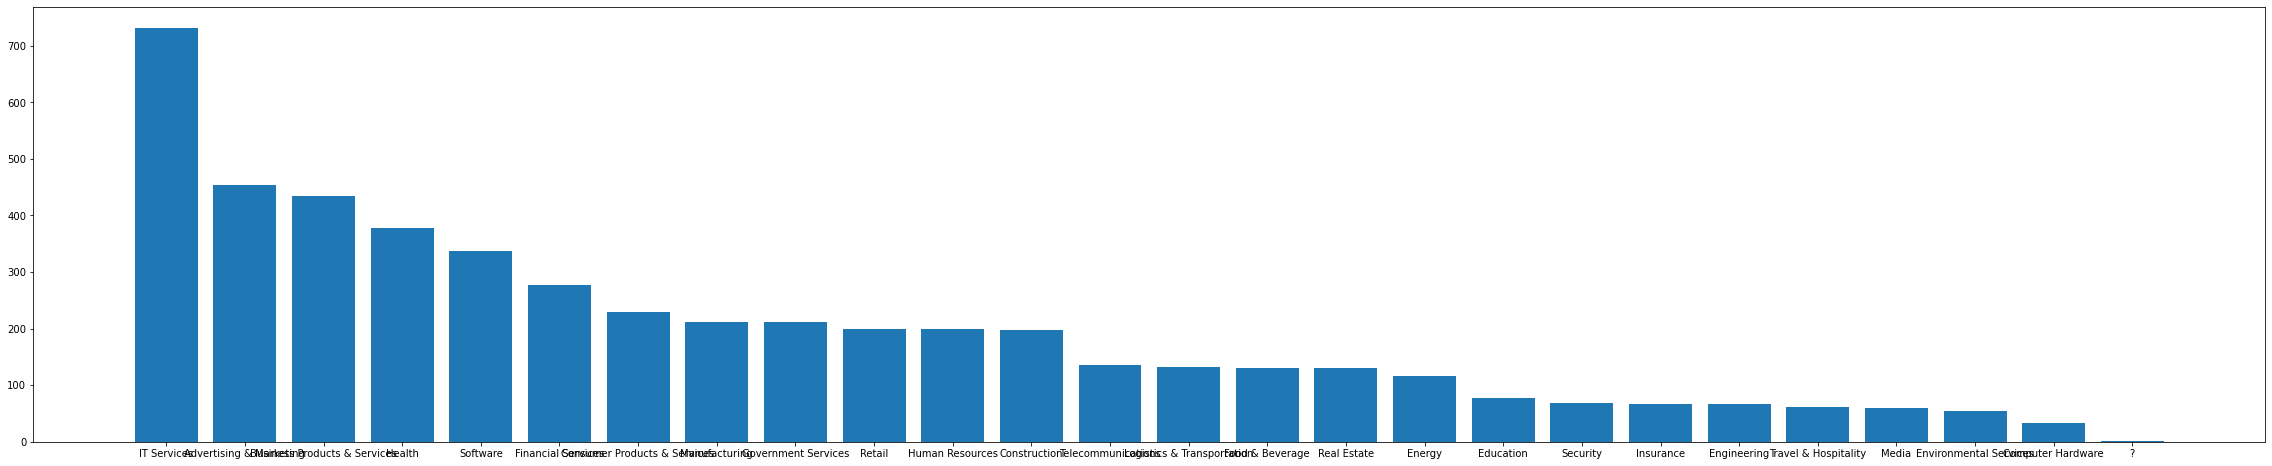

In [13]:
plt.figure(figsize=(40,8))

plt.bar(x=data.industry.value_counts().index,
        height=data.industry.value_counts()
       )

plt.show()

# ONE-WAY ANOVA Test

**From One-Way ANOVA Scipy Documentation: The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.**

<br>

**Task 10.	Write a for loop that will return One-Way ANOVA results between revenue and the following object variables: rank_code and state.**

> First, let's run  One-Way ANOVA only between rank_code and revenue. Then you can use for loop to run the test for multiple object-type variable.

In [86]:
data.rank_code.unique()

array(['Other', 'Top 50', 'Top 10'], dtype=object)

**Before running  One-Way ANOVA test, you should check the equality of variances assumption of the test by usinge Levene's test.**

<br>

**Below, Levene's test results show that p is more than 0.05, therefore there is NO stat significant difference between variances of revenue by the categories of rank_code.**

In [88]:
levene(
data['revenue'][data['rank_code']=='Top 10'],
data['revenue'][data['rank_code']=='Top 50'],
data['revenue'][data['rank_code']=='Other']
)

LeveneResult(statistic=0.47073306808485343, pvalue=0.6245723127709458)

In [89]:
f_oneway(data['revenue'][data['rank_code']=='Top 10'],
data['revenue'][data['rank_code']=='Top 50'],
data['revenue'][data['rank_code']=='Other']
        )

F_onewayResult(statistic=0.6195399225721082, pvalue=0.5382338527154813)

> **The results above indicate that average revenue is stat significantly different between  the categories of rank_code.**

# Data from Yahoo Finance

### From pandas_datareader.data use DataReader() function.

There’re some limitations by making the call to Yahoo Finance API:

- Using the Public API, you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).
- When importing many tickers, use time.sleep(1) (python time module) function to avoid your IP getting blocked

Use ?data.DataReader to see more about <code>DataReader()</code> function.

In [94]:
dis_df=data.DataReader(name='DIS', #name of stock that we want to import
                data_source='yahoo', #source/website from where the data will be imported
                start='2022-01-01' #time period, you can also use "end=" to spesift the end of the period
                      )
dis_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,157.559998,155.360001,155.830002,156.759995,10222800,156.759995
2022-01-04,160.320007,155.550003,158.589996,155.729996,16582000,155.729996
2022-01-05,159.380005,155.100006,156.520004,155.190002,12272100,155.190002
2022-01-06,157.770004,153.679993,156.240005,156.899994,11095300,156.899994
2022-01-07,159.300003,156.289993,156.899994,157.830002,9554600,157.830002


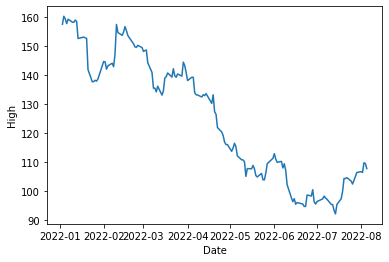

In [97]:
sns.lineplot(x=dis_df.index, y=dis_df.High) #plotting time series data by using lineplot

plt.show()

In [99]:
#importing data for multiple stocks
stocks=data.DataReader(name=['DIS','AAPL','MSFT'],
                data_source='yahoo',
                start='2022-01-01',
                pause=0.1                      
                      )

In [100]:
stocks.head()

Attributes   Adj Close                               Close              \
Symbols           AAPL         DIS        MSFT        AAPL         DIS   
Date                                                                     
2022-01-03  181.511703  156.759995  333.283020  182.009995  156.759995   
2022-01-04  179.208038  155.729996  327.568176  179.699997  155.729996   
2022-01-05  174.441116  155.190002  314.993530  174.919998  155.190002   
2022-01-06  171.529129  156.899994  312.504486  172.000000  156.899994   
2022-01-07  171.698654  157.830002  312.663788  172.169998  157.830002   

Attributes                    High                                 Low  \
Symbols           MSFT        AAPL         DIS        MSFT        AAPL   
Date                                                                     
2022-01-03  334.750000  182.880005  157.559998  338.000000  177.710007   
2022-01-04  329.010010  182.940002  160.320007  335.200012  179.119995   
2022-01-05  316.380005  180.169998  159.380005  326.070007  174.639999   
2022-01-06  313.880005  175.300003  157.770004  318.700012  171.639999   
2022-01-07  314.040009  174.139999  159.300003  316.500000  171.029999   

Attributes                                Open                          \
Symbols            DIS        MSFT        AAPL         DIS        MSFT   
Date                                                                     
2022-01-03  155.360001  329.779999  177.830002  155.830002  335.350006   
2022-01-04  155.550003  326.119995  182.630005  158.589996  334.829987   
2022-01-05  155.100006  315.980011  179.610001  156.520004  325.859985   
2022-01-06  153.679993  311.489990  172.699997  156.240005  313.149994   
2022-01-07  156.289993  310.089996  172.889999  156.899994  314.149994   

Attributes       Volume                          
Symbols            AAPL         DIS        MSFT  
Date                                             
2022-01-03  104487900.0  10222800.0  28865100.0  
2022-01-04   99310400.0  16582000.0  32674300.0  
2022-01-05   94537600.0  12272100.0  40054300.0  
2022-01-06   96904000.0  11095300.0  39646100.0  
2022-01-07   86709100.0   9554600.0  32720000.0

In [103]:
#to_flat_index() function converts multilevel column headings into one-level
stocks.columns.to_flat_index()

Index([('Adj Close', 'AAPL'),  ('Adj Close', 'DIS'), ('Adj Close', 'MSFT'),
           ('Close', 'AAPL'),      ('Close', 'DIS'),     ('Close', 'MSFT'),
            ('High', 'AAPL'),       ('High', 'DIS'),      ('High', 'MSFT'),
             ('Low', 'AAPL'),        ('Low', 'DIS'),       ('Low', 'MSFT'),
            ('Open', 'AAPL'),       ('Open', 'DIS'),      ('Open', 'MSFT'),
          ('Volume', 'AAPL'),     ('Volume', 'DIS'),    ('Volume', 'MSFT')],
      dtype='object')

In [105]:
#creating a list of new headings that instead of 2 levels has only 1 level
stocks.columns=['_'.join(i) for i in stocks.columns.to_flat_index()]

In [106]:
stocks.head()

,Adj Close_AAPL,Adj Close_DIS,Adj Close_MSFT,Close_AAPL,Close_DIS,Close_MSFT,High_AAPL,High_DIS,High_MSFT,Low_AAPL,Low_DIS,Low_MSFT,Open_AAPL,Open_DIS,Open_MSFT,Volume_AAPL,Volume_DIS,Volume_MSFT
Date,,,,,,,,,,,,,,,,,,
2022-01-03,181.511703,156.759995,333.283020,182.009995,156.759995,334.750000,182.880005,157.559998,338.000000,177.710007,155.360001,329.779999,177.830002,155.830002,335.350006,104487900.0,10222800.0,28865100.0
2022-01-04,179.208038,155.729996,327.568176,179.699997,155.729996,329.010010,182.940002,160.320007,335.200012,179.119995,155.550003,326.119995,182.630005,158.589996,334.829987,99310400.0,16582000.0,32674300.0
2022-01-05,174.441116,155.190002,314.993530,174.919998,155.190002,316.380005,180.169998,159.380005,326.070007,174.639999,155.100006,315.980011,179.610001,156.520004,325.859985,94537600.0,12272100.0,40054300.0
2022-01-06,171.529129,156.899994,312.504486,172.000000,156.899994,313.880005,175.300003,157.770004,318.700012,171.639999,153.679993,311.489990,172.699997,156.240005,313.149994,96904000.0,11095300.0,39646100.0
2022-01-07,171.698654,157.830002,312.663788,172.169998,157.830002,314.040009,174.139999,159.300003,316.500000,171.029999,156.289993,310.089996,172.889999,156.899994,314.149994,86709100.0,9554600.0,32720000.0


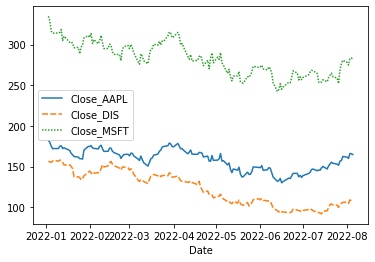

In [108]:
#visualizing multiple measures on one chart

sns.lineplot(data=stocks[['Close_AAPL','Close_DIS','Close_MSFT']])

plt.show()